### Student Information
Name:李敬淇

Student ID: 112033631

GitHub ID: Skccli

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Part 1 - Take Home Exercise
Copy some necessary cells

In [575]:
### Begin Assignment Here

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [576]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---


### >>> **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [577]:
#Answer here
X.query('category < 2')

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
...,...,...,...
2237,From: datepper@phoenix.Princeton.EDU (David Aa...,0,alt.atheism
2241,From: dls@aeg.dsto.gov.au (David Silver) Subje...,1,comp.graphics
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [578]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


**ANS:**

As we can see above,innull() is only used to check specific code.
* For A and B are np.nan.A is asigned by `np.nan` and B is totally empty.

* For C and D ,there can be seem as that they all be signed by value,`'NaN'` and `'None'` .So,we will get 'false' in checkblock.

* For E, it is signed by `None`,means that it consider to be empty here.

* For F, there is `''`. So, we can also consider that it is signed by value in F. However, the text is nothing. 

And we may modify it by this way below:


In [579]:
# Answer here
NA_df['missing_example'].replace(['NaN' , 'None' , ''] , None , inplace=True)
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

**ANS:** 

We can compare them directly by their attributes, size, or structure.

Typically, when creating a `sample` dataframe from an original `X` dataframe, some changes we mmay notice that,

1. **Size:** The `X_sample` dataframe is likely to be smaller . This is because it's a subset of the original `X` dataframe.

2. **Different Data:** The data in the `X_sample` dataframe will be different from the original `X` dataframe.Because it is randomly selected.

3. **Index:** Because it may selected randomly , the index may be reset in X_sample. 

4. **Statistics:** The descriptive statistics for the `X_sample` dataframe, like `mean`, `standard deviation`,may be different from the original `X` dataframe.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [580]:
X_sample = X.sample(n=1000,random_state=42) #random state

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

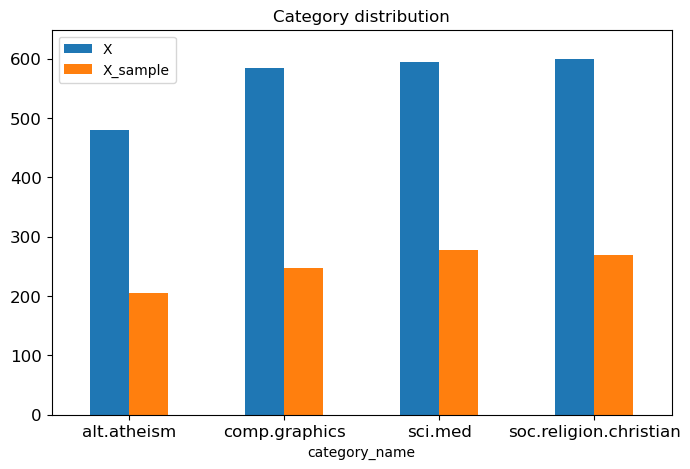

In [581]:
# Answer here
upper_bound = max(X.category_name.value_counts()) + 50

df_ = pd.DataFrame({'X': X.category_name.value_counts(), 
                    'X_sample': X_sample.category_name.value_counts()})

df_.plot(kind='bar', title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,5))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [582]:
import nltk
nltk.download('punkt')

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Skccli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [583]:
position = np.where(X_counts[4, :100].toarray() == 1) # To find where 1 is

print(position[0:]) # Show that there are two 1

count_vect.get_feature_names_out()[position[1][1] : position[1][1] + 1] # We want to find second 1

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))


array(['01'], dtype=object)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

---
**Ans:**

For this excercise, I attempted to modify a 100x100 matrix by removing rows and columns with zero values(if they all zero), try to make it condense.
In order to identify the zero terms and zero documents, I utilized `np.where()` and `np.sum()`.

In [584]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
print(plot_x)

['term_00', 'term_000', 'term_0000', 'term_0000001200', 'term_000005102000', 'term_0001', 'term_000100255pixel', 'term_00014', 'term_000406', 'term_0007', 'term_000usd', 'term_0010', 'term_001004', 'term_0010580b', 'term_001125', 'term_001200201pixel', 'term_0014', 'term_001642', 'term_00196', 'term_002', 'term_0028', 'term_003258u19250', 'term_0033', 'term_0038', 'term_0039', 'term_004021809', 'term_004158', 'term_004627', 'term_0049', 'term_00500', 'term_005148', 'term_00630', 'term_008561', 'term_0094', 'term_00am', 'term_00index', 'term_00pm', 'term_01', 'term_0100', 'term_010116', 'term_010702', 'term_011255', 'term_011308pxf3', 'term_011605', 'term_011720', 'term_012019', 'term_012536', 'term_012946', 'term_013', 'term_013034', 'term_0131', 'term_013423tan102', 'term_013657', 'term_0138', 'term_013846', 'term_0150', 'term_015518', 'term_01580', 'term_015931', 'term_01720', 'term_01752', 'term_0179', 'term_01821', 'term_01830', 'term_0184', 'term_01852', 'term_01854', 'term_01890'

In [585]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39', 'doc_40', 'doc_41', 'doc_42', 'doc_43', 'doc_44', 'doc_45', 'doc_46', 'doc_47', 'doc_48', 'doc_49', 'doc_50', 'doc_51', 'doc_52', 'doc_53', 'doc_54', 'doc_55', 'doc_56', 'doc_57', 'doc_58', 'doc_59', 'doc_60', 'doc_61', 'doc_62', 'doc_63', 'doc_64', 'doc_65', 'doc_66', 'doc_67', 'doc_68', 'doc_69', 'doc_70', 'doc_71', 'doc_72', 'doc_73', 'doc_74', 'doc_75', 'doc_76', 'doc_77', 'doc_78', 'doc_79', 'doc_80', 'doc_81', 'doc_82', 'doc_83', 'doc_84', 'doc_85', 'doc_86', 'doc_87', 'doc_88', 'doc_89', 'doc_90', 'doc_91', 'doc_92', 'doc_93', 'doc_94', 'doc_95', 'doc_96', 'doc_97', 'doc_98', 'doc_99']


In [586]:
plot_z = X_counts[0:100, 0:100].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [587]:
z_t = []
z_d = []

z_d = np.where(np.sum(plot_z , axis = 1) == 0)[0]
plot_y = np.delete(plot_y , z_d)
plot_z = np.delete(plot_z , z_d , axis = 0)

z_t = np.where(np.sum(plot_z , axis = 0) == 0)[0]
plot_x = np.delete(plot_x , z_t)
plot_z = np.delete(plot_z , z_t , axis = 1)

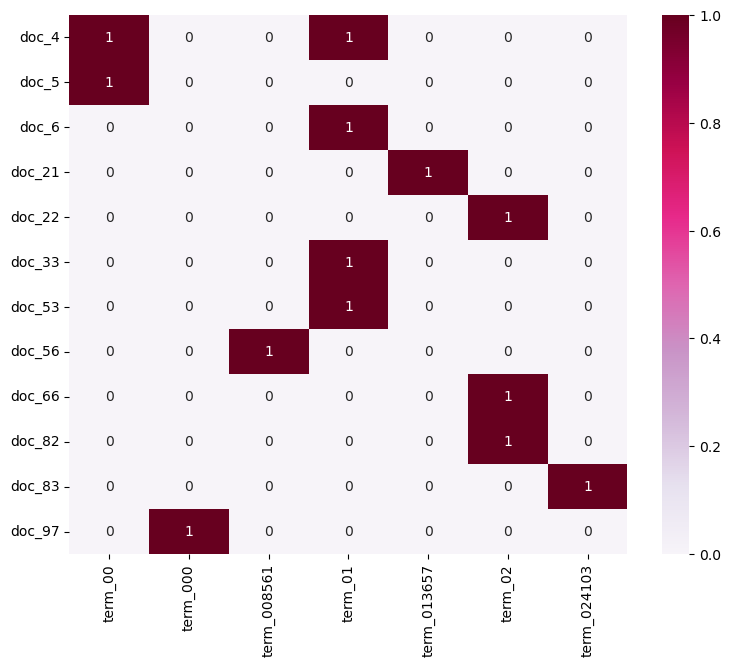

In [588]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax = np.max(plot_z), annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

**Ans:**
* 3D

In [589]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

print(X_reduced.shape)



(2257, 3)


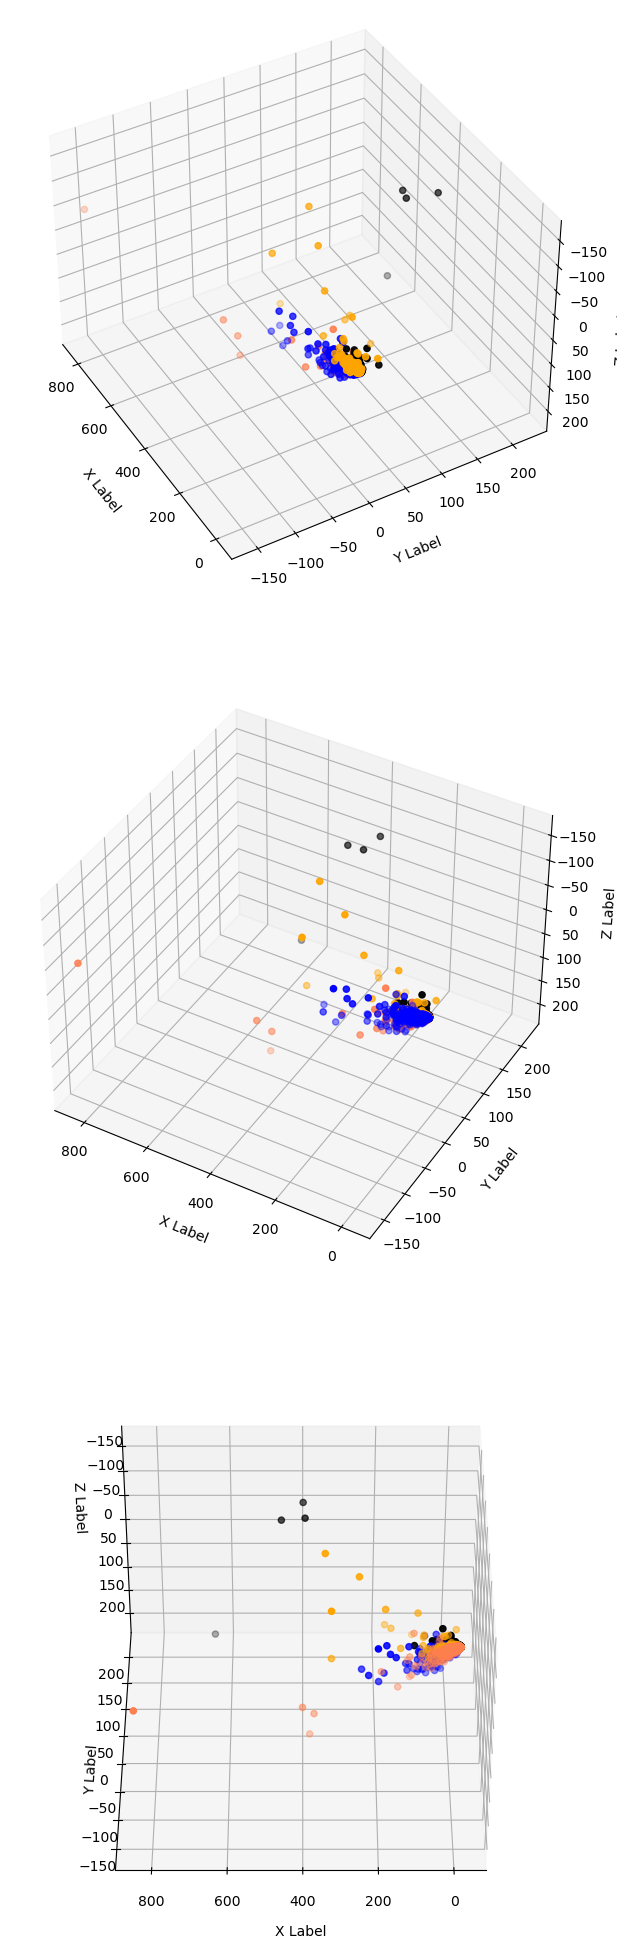

In [590]:
col = ['coral', 'blue', 'black', 'orange']
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (25,25))

d = [(-140, 30 , 311), (-140, 60, 312), (-140, 90, 313)]
for a , b , i in d:
    ax = fig.add_subplot(i,projection='3d')
    for c, category in zip(col, categories):
       x= X_reduced[X['category_name'] == category].T[0]
       y= X_reduced[X['category_name'] == category].T[1]
       z= X_reduced[X['category_name'] == category].T[2]

       ax.scatter(x, y, z, c = c, marker='o')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(a, b)


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [591]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [592]:
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
x=count_vect.get_feature_names_out()[:300]
y=term_frequencies[:300]

xy_ = list(zip(x, y))
sorted_ = sorted(xy_, key = lambda x: -x[1])
fig = px.bar(x=x, y=y, labels={'x': 'Term', 'y': 'Frequency'}, title='Terms by Frequency')

fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


**ANS:**

Try to reduce those who less than the mean of all terms.

In [593]:
import plotly.express as px
from statistics import mean

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
x = count_vect.get_feature_names_out()[:100]
_y = np.delete(term_frequencies, np.where(term_frequencies <= mean(term_frequencies)))
fig = px.bar(x=x, y=_y[:100], labels={'x': 'Term', 'y': 'Frequency'}, title='Terms by Frequency')

fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [594]:
import plotly.express as px

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
x=count_vect.get_feature_names_out()[:300]
y=term_frequencies[:300]

xy_ = list(zip(x, y))
sorted_ = sorted(xy_, key = lambda x: -x[1])

_x = [item[0] for item in sorted_[:]]
_y = [item[1] for item in sorted_[:]]
fig = px.bar(x=_x, y=_y, labels={'x': 'Term', 'y': 'Frequency'}, title='Terms by Frequency')

fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

**ANS:**

Yes!The result is below.

In [595]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr...","[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha...","[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G...","[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[From, :, Dan, Wallach, <, dwallach, @, cs.ber...","[0, 0, 1, 0]"


# Part 2 - The new dataset
## 1. The Data 
## 2. Data preparation 

Import and create some necessary part

In [596]:
# categories
categories = ["amazon", "imdb", "yelp"]
columns=["sentence","score"]

In [668]:
# obtain the documents containing the categories provided
path_amazon = 'sentiment labelled sentences/amazon_cells_labelled.txt'
path_imdb = 'sentiment labelled sentences/imdb_labelled.txt'
path_yelp = 'sentiment labelled sentences/yelp_labelled.txt'

delimiter = ' \t'

amazon = pd.read_table(path_amazon , header = None , names = columns, delimiter = '\t', engine = 'python')
imdb= pd.read_table(path_imdb , header = None,names = columns, delimiter = ' \t', engine = 'python')
yelp = pd.read_table(path_yelp, header=None, names=columns, delimiter = '\t', engine='python')

amazon['company'] = "amazon"
imdb['company'] = "imdb"
yelp['company'] = "yelp"

new_dataset = pd.concat([amazon,imdb,yelp], ignore_index=True)
new_dataset



<class 'numpy.int64'>


In [598]:
new_dataset['sentence']

0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
                              ...                        
2995    I think food should have flavor and texture an...
2996                             Appetite instantly gone.
2997    Overall I was not impressed and would not go b...
2998    The whole experience was underwhelming, and I ...
2999    Then, as if I hadn't wasted enough of my life ...
Name: sentence, Length: 3000, dtype: object

In [599]:
new_dataset[80 : 120]

,sentence,score,company
80,I wear it everyday and it holds up very well.,1,amazon
81,Not a good bargain.,0,amazon
82,"Well packaged, arrived on time, and works as i...",1,amazon
83,The battery runs down quickly.,0,amazon
84,"This item worked great, but it broke after 6 m...",0,amazon
85,The headsets are easy to use and everyone love...,1,amazon
86,This phone works great.,1,amazon
87,The construction of the headsets is poor.,0,amazon
88,Product was excellent and works better than th...,1,amazon
89,The phone loads super!,1,amazon


In [600]:
len(new_dataset[0:])

3000

## 3. Data Transformation

* 3.1 Converting Dictionary into Pandas Dataframe

We don't need to do it, because it's already Datafeame.

* 3.2 Familiarizing yourself with the Data

In [601]:
new_dataset[:10][["sentence", "score"]]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


Let's query the last 10 records

In [602]:
new_dataset[-10:]

,sentence,score,company
2990,The refried beans that came with my meal were ...,0,yelp
2991,Spend your money and time some place else.,0,yelp
2992,A lady at the table next to us found a live gr...,0,yelp
2993,the presentation of the food was awful.,0,yelp
2994,I can't tell you how disappointed I was.,0,yelp
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp
2999,"Then, as if I hadn't wasted enough of my life ...",0,yelp


Use loc and iloc

In [603]:
new_dataset.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [604]:
new_dataset.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

 Fetch records to the ```imdb``` and query every 10th record. Only show the first 5 records.

In [605]:
new_dataset[new_dataset['company'] == 'imdb'].iloc[::10][:5]

,sentence,score,company
1000,"A very, very, very slow-moving, aimless movie ...",0,imdb
1010,And those baby owls were adorable.,1,imdb
1020,I can think of no other film where something v...,1,imdb
1030,"There are massive levels, massive unlockable c...",1,imdb
1040,The very idea of it was lame - take a minor ch...,0,imdb


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [606]:
new_dataset.isnull()

,sentence,score,company
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [607]:
new_dataset.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


Check the documentation for more information.

In [608]:
new_dataset.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

Insert some dummy data into the dataframe 

In [609]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [610]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [611]:
dummy_series.to_frame().T

,sentence,score
0,dummy_record,1


In [612]:
result_with_series = pd.concat([new_dataset, dummy_series.to_frame().T], ignore_index=True)

In [613]:
# check if the records was commited into result
len(result_with_series)

3001

Detect there is any missing value in the resulting dataframe 

In [614]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


Remove this dummy record

In [615]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [616]:
new_dataset = pd.concat([new_dataset, pd.DataFrame(dummy_dict)], ignore_index=True)

In [617]:
len(new_dataset)

3001

After remove the record

In [618]:
new_dataset.dropna(inplace=True)

In [619]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [620]:
len(new_dataset)

3000

### 4.2 Dealing with Duplicate Data

In [621]:
new_dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

Check the sum of dupulicate records

In [622]:
sum(new_dataset.duplicated())

17

Check for duplicates by only checking the `sentence` attribute.

In [623]:
sum(new_dataset.duplicated('sentence'))

17

Create dupulicated dummy records 

In [624]:
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }, {'sentence': 'dummy_record',
               'score': 1
              },]

In [625]:
new_dataset = pd.concat([new_dataset, pd.DataFrame(dummy_dict)], ignore_index=True)

In [626]:
len(new_dataset)

3002

In [627]:
sum(new_dataset.duplicated())

18

To get rid of all the duplicated records without preserving a copy

In [628]:
new_dataset.drop_duplicates(keep='first', inplace= True )

In [629]:
len(new_dataset)

2984

## 5 Data Preprocessing
### 5.1 Sampling

In [630]:
print(new_dataset.shape)
new_dataset_sample = new_dataset.sample(n=1000 , replace = False) #random state
display(new_dataset_sample)

(2984, 3)


,sentence,score,company
471,The update procedure is difficult and cumbersome.,0,amazon
2447,Sauce was tasteless.,0,yelp
1596,The characters were all funny and had the pecu...,1,imdb
2822,I love that they put their food in nice plasti...,1,yelp
1171,This movie now joins Revenge of the Boogeyman ...,0,imdb
...,...,...,...
2387,This place deserves one star and 90% has to do...,0,yelp
699,Comfortable fit - you need your headset to be ...,1,amazon
1863,"But, Kevin Spacey is an excellent, verbal tsun...",1,imdb
2150,My fiancé and I came in the middle of the day ...,1,yelp


In [631]:
len(new_dataset_sample)

1000

In [632]:
new_dataset_sample[0:4]

,sentence,score,company
471,The update procedure is difficult and cumbersome.,0,amazon
2447,Sauce was tasteless.,0,yelp
1596,The characters were all funny and had the pecu...,1,imdb
2822,I love that they put their food in nice plasti...,1,yelp


Use matplotlib to do somthing cool

company
imdb      997
yelp      996
amazon    990
Name: count, dtype: int64


<Axes: title={'center': 'Company distribution'}, xlabel='company'>

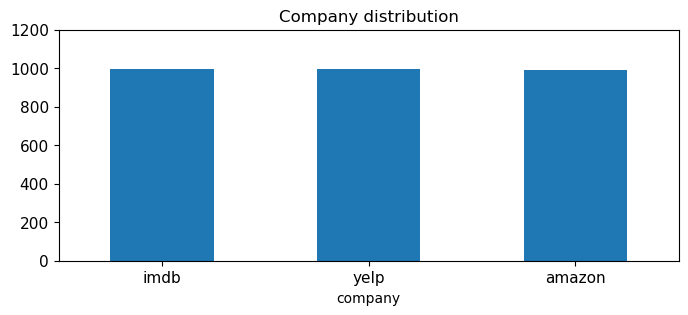

In [633]:
print(new_dataset.company.value_counts())

# plot barchart for X
new_dataset.company.value_counts().plot(kind = 'bar',
                                    title = 'Company distribution',
                                    ylim = [0,1200],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

Comparison of the distribution between the two datasets

<Axes: title={'center': 'company distribution'}, xlabel='company'>

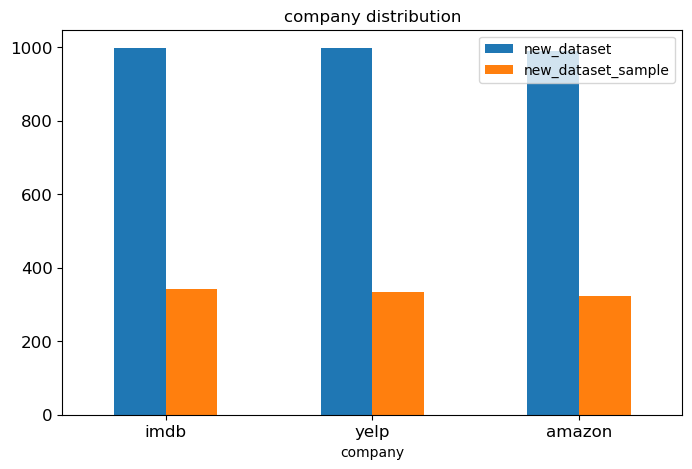

In [634]:
# Answer here
upper_b = max(new_dataset.company.value_counts()) + 50

df_ = pd.DataFrame({'new_dataset':new_dataset.company.value_counts(), 
                    'new_dataset_sample': new_dataset_sample.company.value_counts()})

df_.plot(kind='bar', title = 'company distribution',
                                           ylim = [0, upper_b], 
                                           rot = 0, fontsize = 12, figsize = (8,5))

### 5.2 Feature Creation

In [635]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Skccli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [636]:
# takes a like a minute or two to process
new_dataset['unigrams'] = new_dataset['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [637]:
new_dataset[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [638]:
new_dataset[0:4]

,sentence,score,company,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [639]:
list(new_dataset[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

Generate the table

In [640]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
new_dataset_counts = count_vect.fit_transform(new_dataset.sentence) #learn the vocabulary and return document-term matrix
print(new_dataset_counts.shape)
print(new_dataset_counts[0])

(2984, 5156)
  (0, 4162)	1
  (0, 4546)	1
  (0, 2428)	1
  (0, 3044)	1
  (0, 4988)	1
  (0, 1830)	1
  (0, 2810)	1
  (0, 4610)	1
  (0, 3388)	1
  (0, 2433)	1
  (0, 2315)	2
  (0, 2159)	1
  (0, 4532)	1
  (0, 4836)	1
  (0, 4794)	1
  (0, 1983)	1
  (0, 647)	1
  (0, 1013)	1


In [641]:
analyze = count_vect.build_analyzer()
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [642]:
analyze = count_vect.build_analyzer()
analyze(new_dataset.sentence[0])
# stop words

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [643]:
new_dataset_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [644]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [645]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]

plot_z = new_dataset_counts[0:100, 0:100].toarray() 

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_accessable,term_accessible,term_accessing,term_accessory,term_accessoryone,term_accident,term_accidentally,term_acclaimed,term_accolades,term_accommodations
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


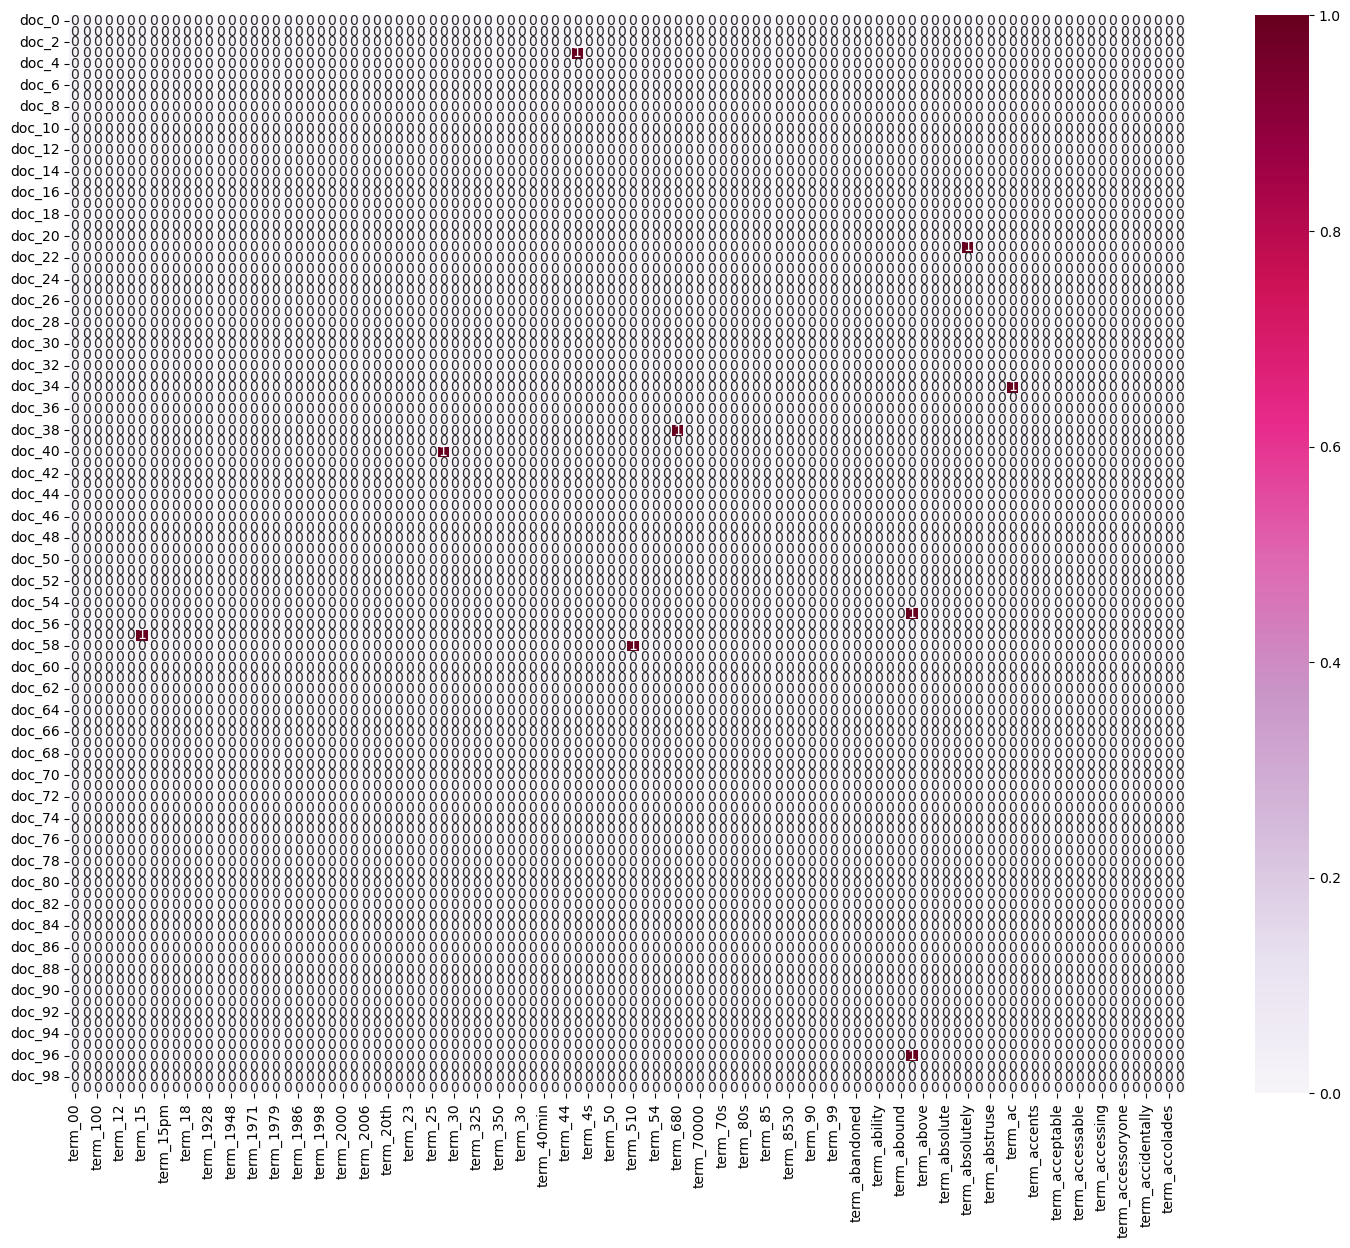

In [646]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


Like excercise 11, I modify a 100x100 matrix by removing rows and columns with zero values to make it condense.

In [647]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980', 'term_1986', 'term_1995', 'term_1998', 'term_20', 'term_2000', 'term_2005', 'term_2006', 'term_2007', 'term_20th', 'term_2160', 'term_23', 'term_24', 'term_25', 'term_2mp', 'term_30', 'term_30s', 'term_325', 'term_35', 'term_350', 'term_375', 'term_3o', 'term_40', 'term_40min', 'term_42', 'term_44', 'term_45', 'term_4s', 'term_4ths', 'term_50', 'term_5020', 'term_510', 'term_5320', 'term_54', 'term_5lb', 'term_680', 'term_70', 'term_70000', 'term_700w', 'term_70s', 'term_80', 'term_80s', 'term_8125', 'term_85', 'term_8525', 'term_8530', 'term_8pm', 'term_90', 'term_95', 'term_99', 'term_aailiyah', 'term_abandoned', 'term_abhor', 'term_ability', 'term_able', 'term_abound', 'term_about', 'term_above', 'term_abroad', 'term_absolute', 'term_absolutel'

In [648]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39', 'doc_40', 'doc_41', 'doc_42', 'doc_43', 'doc_44', 'doc_45', 'doc_46', 'doc_47', 'doc_48', 'doc_49', 'doc_50', 'doc_51', 'doc_52', 'doc_53', 'doc_54', 'doc_55', 'doc_56', 'doc_57', 'doc_58', 'doc_59', 'doc_60', 'doc_61', 'doc_62', 'doc_63', 'doc_64', 'doc_65', 'doc_66', 'doc_67', 'doc_68', 'doc_69', 'doc_70', 'doc_71', 'doc_72', 'doc_73', 'doc_74', 'doc_75', 'doc_76', 'doc_77', 'doc_78', 'doc_79', 'doc_80', 'doc_81', 'doc_82', 'doc_83', 'doc_84', 'doc_85', 'doc_86', 'doc_87', 'doc_88', 'doc_89', 'doc_90', 'doc_91', 'doc_92', 'doc_93', 'doc_94', 'doc_95', 'doc_96', 'doc_97', 'doc_98', 'doc_99']


In [649]:
plot_z = new_dataset_counts[0:100, 0:100].toarray() 
print(plot_z)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [650]:
z_t = []
z_d = []

z_d = np.where(np.sum(plot_z , axis = 1) == 0)[0]
plot_y = np.delete(plot_y , z_d)
plot_z = np.delete(plot_z , z_d , axis = 0)

z_t = np.where(np.sum(plot_z , axis = 0) == 0)[0]
plot_x = np.delete(plot_x , z_t)
plot_z = np.delete(plot_z , z_t , axis = 1)

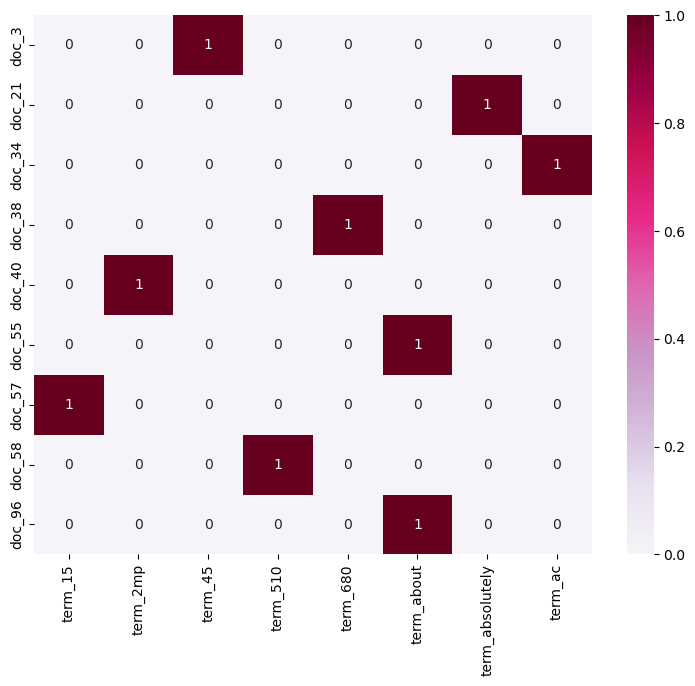

In [651]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax = np.max(plot_z), annot=True)

### 5.4 Dimensionality Reduction

Do PCA and show 2D plot 

In [652]:
from sklearn.decomposition import PCA

print(new_dataset_counts.shape)
new_dataset_reduced = PCA(n_components = 2).fit_transform(new_dataset_counts.toarray())
print(new_dataset_reduced.shape)

(2984, 5156)
(2984, 2)


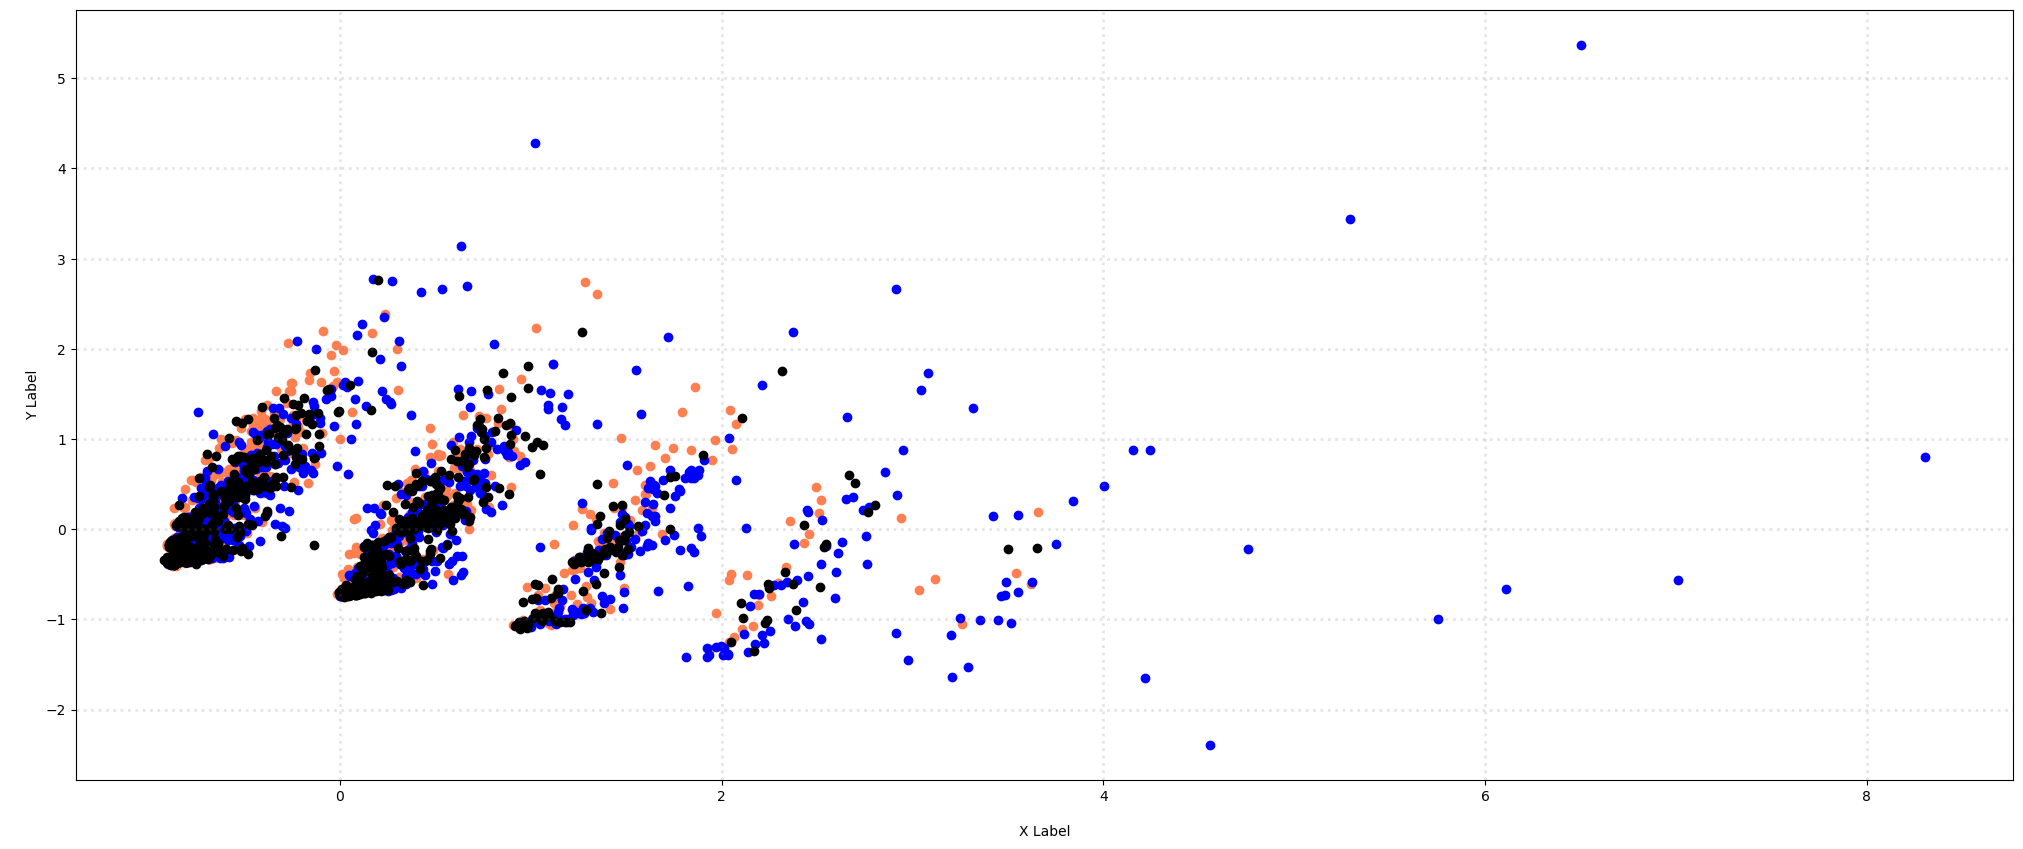

In [653]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = new_dataset_reduced[new_dataset['company'] == category].T[0]
    ys = new_dataset_reduced[new_dataset['company'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

For 3D

In [654]:
from sklearn.decomposition import PCA
new_dataset_reduced = PCA(n_components = 3).fit_transform(new_dataset_counts.toarray())

print(new_dataset_reduced.shape)


(2984, 3)


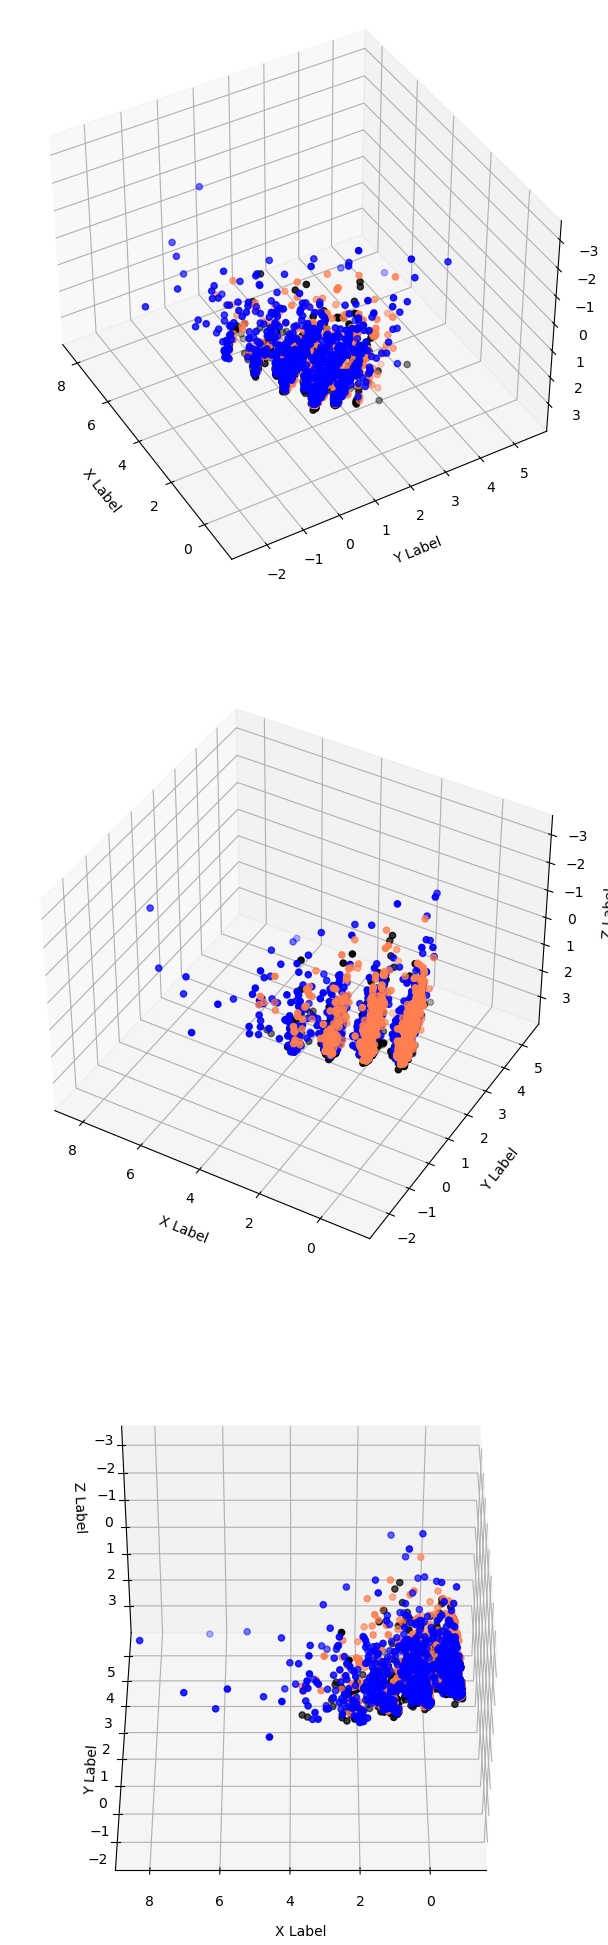

In [655]:

col = ['coral', 'blue', 'black', 'orange']
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (25,25))

d = [(-140, 30 , 311), (-140, 60, 312), (-140, 90, 313)]
for a , b , i in d:
    ax = fig.add_subplot(i,projection='3d')
    for c, category in zip(col, categories):
       x= new_dataset_reduced[new_dataset['company'] == category].T[0]
       y= new_dataset_reduced[new_dataset['company'] == category].T[1]
       z= new_dataset_reduced[new_dataset['company'] == category].T[2]

       ax.scatter(x, y, z, c = c, marker='o')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(a, b)


### 5.5 Attribute Transformation / Aggregation

In [656]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(new_dataset_counts.shape[1])
for j in range(0,new_dataset_counts.shape[1]):
    term_frequencies.append(sum(new_dataset_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

5156


In [657]:
term_frequencies = np.asarray(new_dataset_counts.sum(axis=0))[0]

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



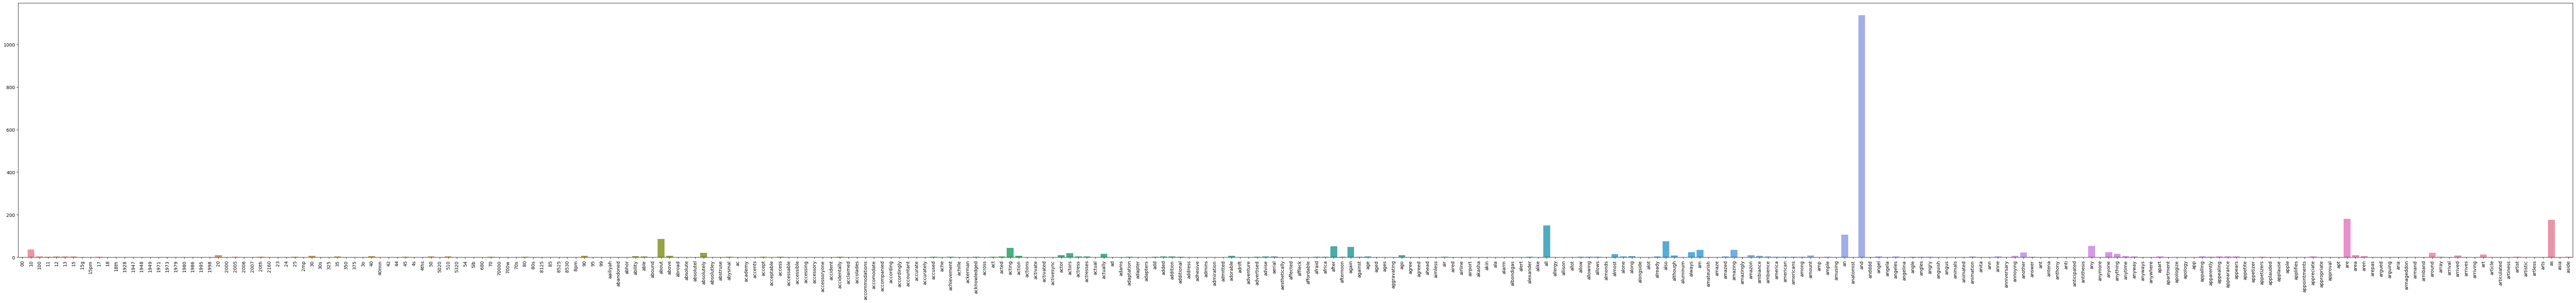

In [658]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [659]:
import plotly.express as px

term_frequencies = np.asarray(new_dataset_counts.sum(axis=0))[0]
x=count_vect.get_feature_names_out()[:300]
y=term_frequencies[:300]

xy_ = list(zip(x, y))
sorted_ = sorted(xy_, key = lambda x: -x[1])
fig = px.bar(x=x, y=y, labels={'x': 'Term', 'y': 'Frequency'}, title='Terms by Frequency')

fig.show()

In [660]:
import plotly.express as px
from statistics import mean

term_frequencies = np.asarray(new_dataset_counts.sum(axis=0))[0]
x = count_vect.get_feature_names_out()[:100]
_y = np.delete(term_frequencies, np.where(term_frequencies <= mean(term_frequencies)))
fig = px.bar(x=x, y=_y[:100], labels={'x': 'Term', 'y': 'Frequency'}, title='Terms by Frequency')

fig.show()

In [661]:
import plotly.express as px

term_frequencies = np.asarray(new_dataset_counts.sum(axis=0))[0]
x=count_vect.get_feature_names_out()[:300]
y=term_frequencies[:300]

xy_ = list(zip(x, y))
sorted_ = sorted(xy_, key = lambda x: -x[1])

_x = [item[0] for item in sorted_[:]]
_y = [item[1] for item in sorted_[:]]
fig = px.bar(x=_x, y=_y, labels={'x': 'Term', 'y': 'Frequency'}, title='Terms by Frequency')

fig.show()

Attribute transformation

In [662]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


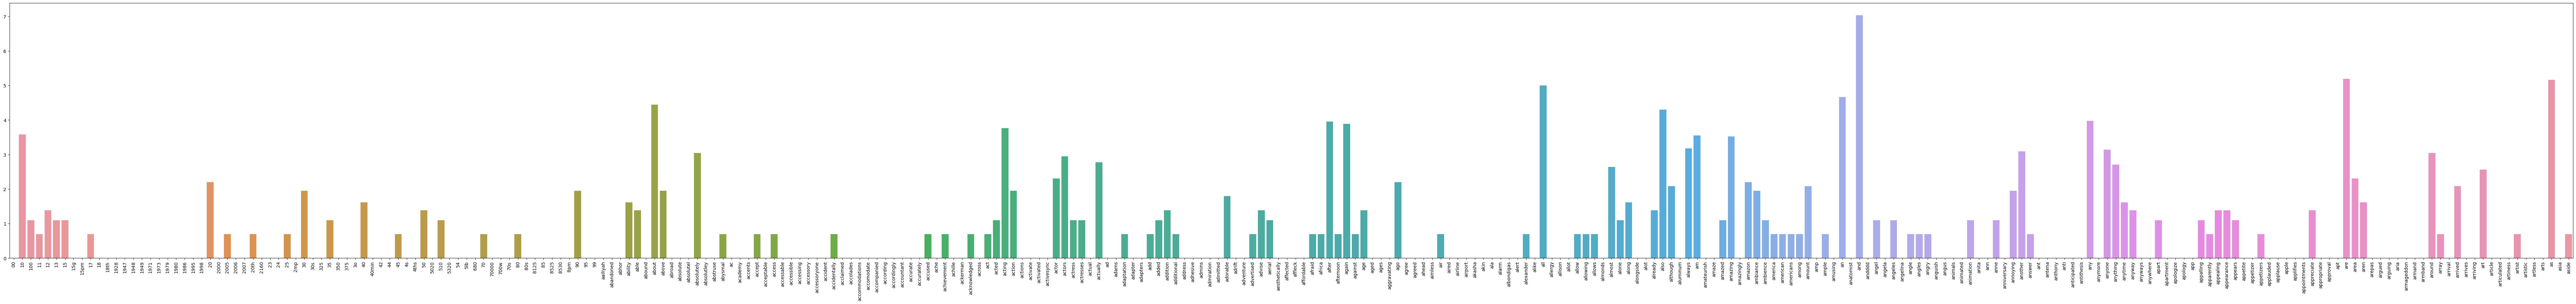

In [663]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### 5.6 Discretization and Binarization

In [664]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
print(type(new_dataset.score[0]))
print(type(X.category))

<class 'numpy.int64'>
<class 'pandas.core.series.Series'>


In [665]:
mlb.fit(new_dataset.score)


LabelBinarizer()

In [669]:
new_dataset['bin_company'] = mlb.transform(new_dataset['company']).tolist()
new_dataset[0:9]

,sentence,score,company,bin_company
0,So there is no way for me to plug it in here i...,0,amazon,"[0, 0]"
1,"Good case, Excellent value.",1,amazon,"[0, 0]"
2,Great for the jawbone.,1,amazon,"[0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[0, 0]"
4,The mic is great.,1,amazon,"[0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[0, 0]"


In [670]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(new_dataset.company)
new_dataset['bin_company'] = mlb.transform(new_dataset['company']).tolist()
new_dataset

,sentence,score,company,bin_company
0,So there is no way for me to plug it in here i...,0,amazon,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[1, 0, 0]"
4,The mic is great.,1,amazon,"[1, 0, 0]"
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp,"[0, 0, 1]"
2996,Appetite instantly gone.,0,yelp,"[0, 0, 1]"
2997,Overall I was not impressed and would not go b...,0,yelp,"[0, 0, 1]"
2998,"The whole experience was underwhelming, and I ...",0,yelp,"[0, 0, 1]"


## 6 Data Exploration

In [671]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = new_dataset.iloc[200]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = new_dataset.iloc[300]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = new_dataset.iloc[450]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [672]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The color is even prettier than I thought it would be, and the graphics are incredibly sharp.']
['Sending it back.']
["i'm glad i found this product on amazon it is hard to find, it wasn't high priced."]


In [673]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [674]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.136083
Cosine Similarity using count bw 1 and 3: 0.171499
Cosine Similarity using count bw 2 and 3: 0.280056
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Skccli\AppData\Local\Temp\ipykernel_15624\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Skccli\AppData\Local\Temp\ipykernel_15624\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Skccli\AppData\Local\Temp\ipykernel_15624\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Skccli\AppData\Local\Temp\ipykernel_15624\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 t

# 3 Following Tasks to New Datasets
## 3.1 New data visualization
Because this data is some comments, we want to analyze which comments tend to be positive or negative. 
* So I do the `Worldcloud` first.


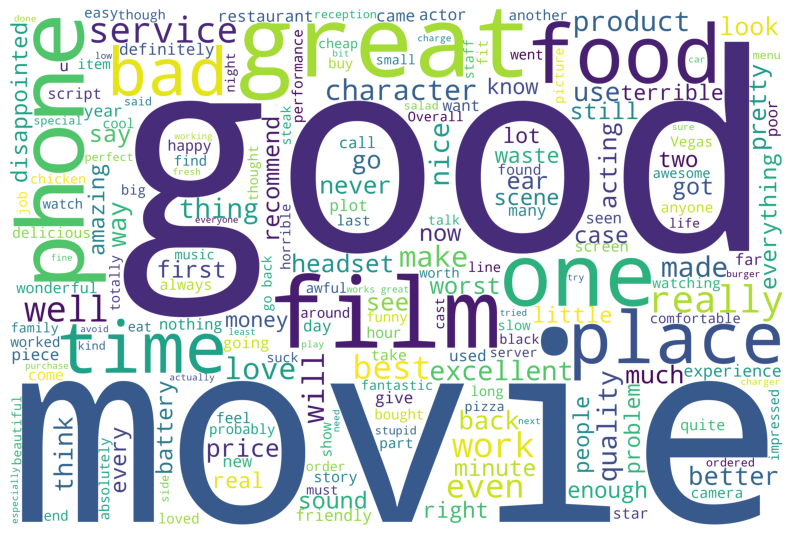

In [675]:
from wordcloud import WordCloud, STOPWORDS

wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(new_dataset['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

We can also categorize the visualizations based on `negative` and `positive` sentiment.
* Positive

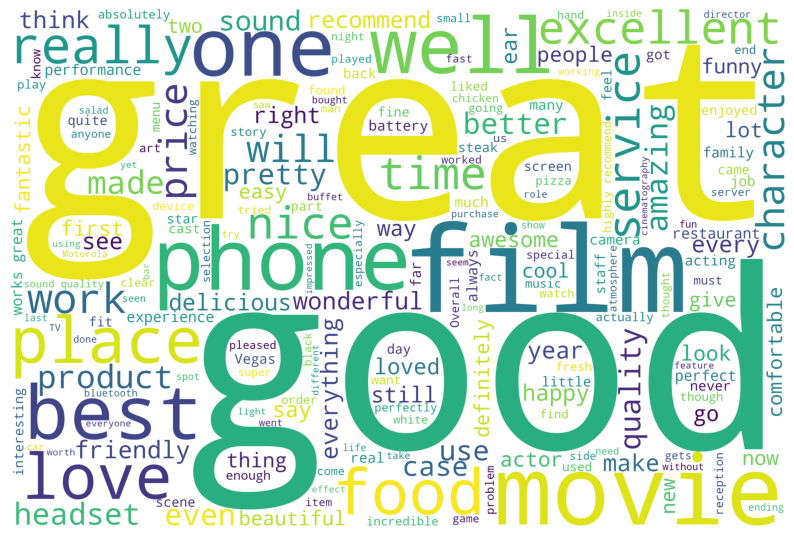

In [676]:
new_dataset_positive = new_dataset.query('score == 1').copy()
wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(new_dataset_positive['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

* Negative

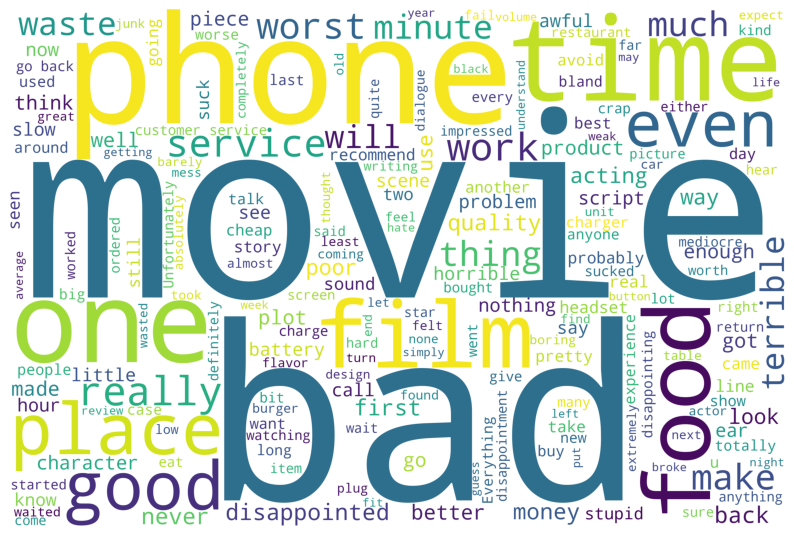

In [677]:
new_dataset_negative = new_dataset.query('score == 0').copy()
wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(new_dataset_negative['sentence']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

* Comment Length vs. Sentiment

In this part, I want to compare comment length and sentiment. And also, try to find something special in different company's comments.

<Axes: title={'center': 'Sentiments vs. Comment Length'}, xlabel='Company', ylabel='Average Comment Length'>

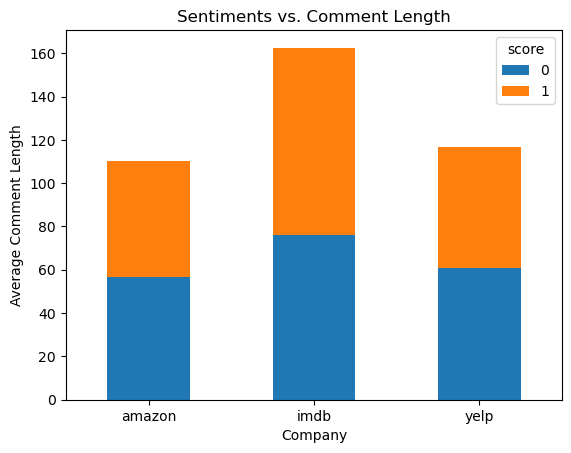

In [678]:
df = pd.DataFrame(new_dataset)

df['comment_length'] = df['sentence'].apply(len)

grouped = df.groupby(['company', 'score'])['comment_length'].mean()

result = grouped.unstack()

result.plot(kind='bar', stacked=True, xlabel='Company', ylabel='Average Comment Length', title='Sentiments vs. Comment Length', rot = 0)

Here show something intertsting, we can observe that the `imbd` comments are longer than those of the other companies. 

This is relatively easy to analyze: `imdb` comments pertain to movies, and customers are more inclined to provide detailed commentary on the movie's storyline.

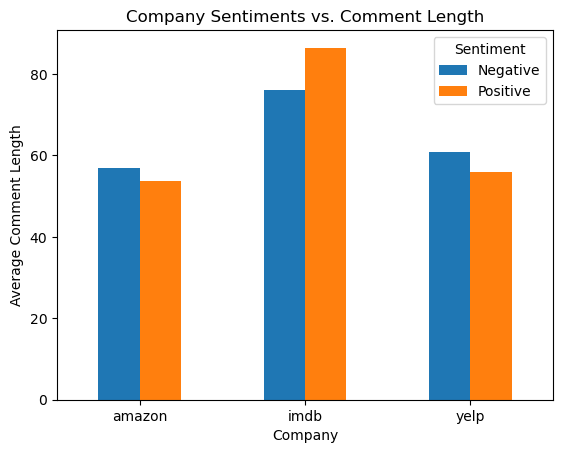

In [679]:
ax = result.plot(kind='bar', stacked=False, xlabel='Company', ylabel='Average Comment Length', title='Company Sentiments vs. Comment Length', rot = 0)

# Customize the plot (add labels)
ax.set_xticks(range(len(result.index)))
ax.set_xticklabels(result.index)
ax.legend(title='Sentiment', labels=['Negative', 'Positive'])

plt.show()

* Bipolar Bar Chart of Selected Top and Bottom Words by Sentiment

In this part, I want to find the most negative and the most positive sentiments, aiming to determine the sentiment or emotional tone expressed in a piece of text. However, there is a lot of data, and I will only perform this action on the first 300 rows of the dataset. I will choose 1 word out of every 50 words from them.

In [680]:
import pandas as pd
from textblob import TextBlob
df = pd.DataFrame(new_dataset[:300])
df['sentiment_score'] = df['sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['words'] = df['sentence'].str.split()

C:\Users\Skccli\AppData\Local\Temp\ipykernel_15624\283137243.py:8: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



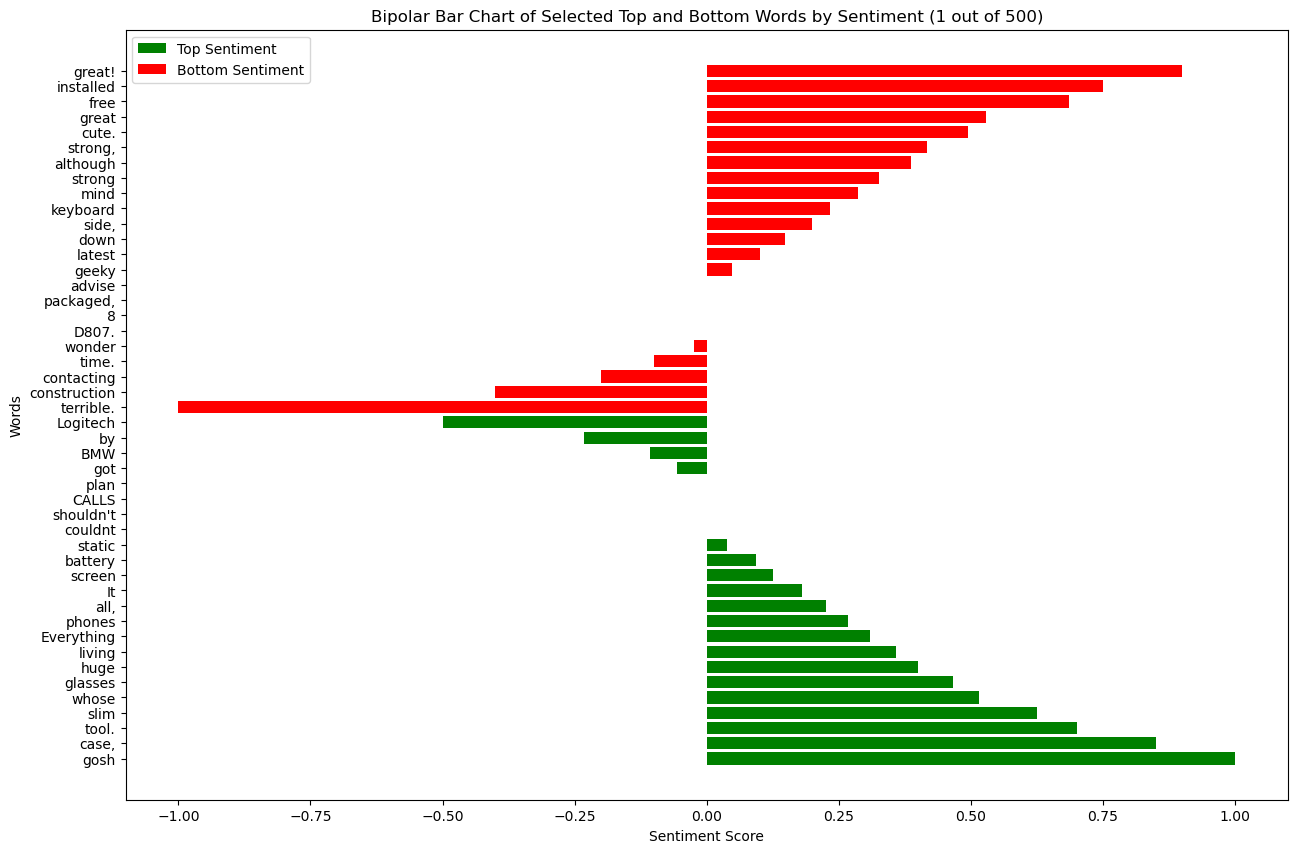

In [681]:
word_sentiments = pd.DataFrame(columns=['word', 'sentiment_score', 'company'])

for index, row in df.iterrows():
    sentiment = row['sentiment_score']
    company = row['company']
    words = row['words']
    for word in words:
        word_sentiments = pd.concat([word_sentiments, pd.DataFrame({'word': [word],'sentiment_score': [sentiment],'company': [company]})], ignore_index=True)

word_sentiment_avg = word_sentiments.groupby(['word', 'company'])['sentiment_score'].mean().reset_index()
highest_sentiment_words = word_sentiment_avg.sort_values(by='sentiment_score', ascending=False)
lowest_sentiment_words = word_sentiment_avg.sort_values(by='sentiment_score')

top_words_selection = highest_sentiment_words.iloc[::50, :]
bottom_words_selection = lowest_sentiment_words.iloc[::50, :]

plt.figure(figsize=(15, 10))
plt.barh(top_words_selection['word'], top_words_selection['sentiment_score'], color='green', label='Top Sentiment')
plt.barh(bottom_words_selection['word'], bottom_words_selection['sentiment_score'], color='red', label='Bottom Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Words')
plt.title('Bipolar Bar Chart of Selected Top and Bottom Words by Sentiment (1 out of 500)')
plt.legend()
plt.show()

## 3.2 Generate TF-IDF features from the tokens of each text

* By sklearn, try to identify TF-IDF

In [682]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = new_dataset['sentence'] 

# Instantiate vectorizer
tfidf_vect = TfidfVectorizer()

# Generate TF-IDF term vector
new_dataset_tfidf = tfidf_vect.fit_transform(text)

# Check
tfidf_vect.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [683]:
new_dataset_tfidf.shape

(3000, 5155)

In [684]:
# create list of feature names
tfidf_tokens = tfidf_vect.get_feature_names_out()

In [685]:
# create pandas Dataframe of the tokens
tfidf_data = pd.DataFrame(data = new_dataset_tfidf.toarray(),
                            index = new_dataset.index,
                            columns = tfidf_tokens)
tfidf_data

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [686]:
# To show the weight of terms
print(new_dataset_tfidf[0])

  (0, 1013)	0.3982952688733835
  (0, 647)	0.22339534467811012
  (0, 1982)	0.23151202391135026
  (0, 4793)	0.33187908783248754
  (0, 4835)	0.27541073174789316
  (0, 4531)	0.08671624087955355
  (0, 2158)	0.22277715355242936
  (0, 2314)	0.2956111707754561
  (0, 2432)	0.11981679118086065
  (0, 3387)	0.30861882226834114
  (0, 4609)	0.1274893309301928
  (0, 2809)	0.22865092628677175
  (0, 1829)	0.15620766310867332
  (0, 4987)	0.24912940464591313
  (0, 3043)	0.22339534467811012
  (0, 2427)	0.12068394874592439
  (0, 4545)	0.20763211346881053
  (0, 4161)	0.18746612963796125


In [687]:
# analyze
analyze = tfidf_vect.build_analyzer()
new_dataset_tfidf[0:5, 0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

* To delete zero terms and show the plot

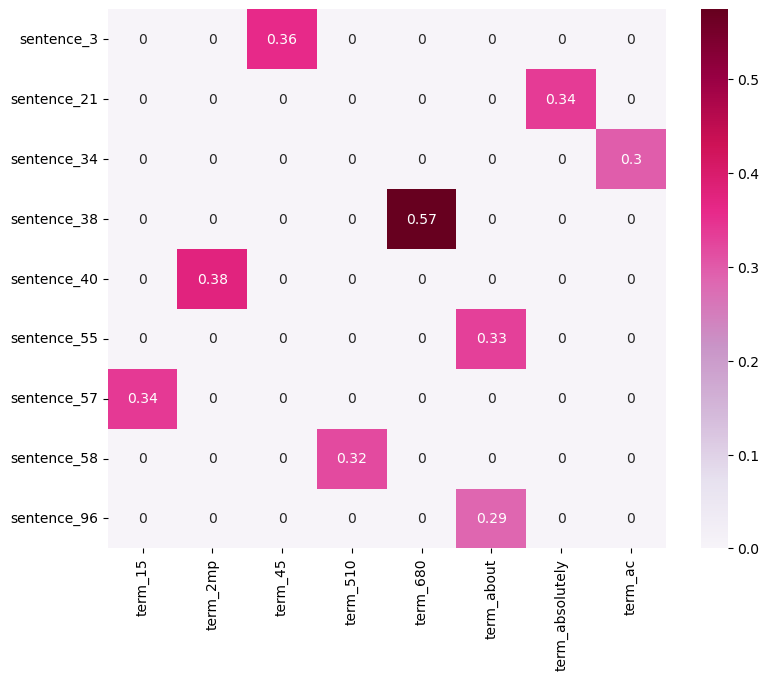

In [688]:
# first 100 features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["sentence_"+ str(i) for i in list(new_dataset.index)[0:100]]
plot_z = new_dataset_tfidf[0:100, 0:100].toarray()
z_t = []
z_d = []

z_d = np.where(np.sum(plot_z , axis = 1) == 0)[0]
plot_y = np.delete(plot_y , z_d)
plot_z = np.delete(plot_z , z_d , axis = 0)

z_t = np.where(np.sum(plot_z , axis = 0) == 0)[0]
plot_x = np.delete(plot_x , z_t)
plot_z = np.delete(plot_z , z_t , axis = 1)
import seaborn as sns
import matplotlib.pyplot as plt

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y )
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax = np.max(plot_z), annot=True)

## 3.3 Implement a simple Naive Bayes classifier that automatically classifies the records into their categories

### Follow the article, I try to implement  `Naive Bayes classifier` that automatically classifies the records into their categories.

#### 3.3.1 Use TF-IDF features to implenment

In [689]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [690]:
X = new_dataset['sentence']
y = new_dataset['score']

* Let our data to be testing data and traing data

In [691]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Here we create a TF-IDF vectorizer and traing the naive bayes classifier

In [692]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [693]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

* Predict it

In [694]:
y_pred = naive_bayes_classifier.predict(X_test_tfidf)


* The result

In [695]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8133333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       299
           1       0.82      0.80      0.81       301

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



#### 3.3.2 Use word frequency features to implement 

Like previous part 3.3.1 we can implenment it again by using `words frequency `.

In [696]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [697]:
count_vectorizer = CountVectorizer(max_features=1000)
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [698]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [699]:
y_pred = naive_bayes_classifier.predict(X_test_counts)

* The result

In [700]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7988888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       424
           1       0.81      0.81      0.81       476

    accuracy                           0.80       900
   macro avg       0.80      0.80      0.80       900
weighted avg       0.80      0.80      0.80       900



# 4 Discussion Some Problem 

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

1. I consider that the construction of the heatmap is relatively inefficient, and it can be challenging to observe certain data characteristics through the charts unless we remove the parts where zero terms and zero documents.

2. When analyzing the most frequently occurring negative or positive sentences, I noticed that even after using `get_feature_names_out`, there are still many common words such as I, and, and so on. Calculating these terms consumes a significant amount of computational resources. I believe it's necessary to address this issue before starting the analysis for better efficiency.

3. Many repetitive methods should be encapsulated into functions and imported to avoid code clutter and save computational resources.